# Pymaceuticals Inc.
---

### Analysis
This code analyzes the performance of the drug of interest, Capomulin, against the other treatment regimens in the recent animal study on squamous cell carcinoma (SCC).

- Capomulin yields significantly smaller tumor at the end of the treatment compared to Infubinol and Ceftamin. Another contestent which yields similar results is Ramicane.
- A significant decline in the tumor size over time can be seen from a randomly sampled subject that underwent the treatment with Capomulin.
- The weight of the subjects have a strong correlation with the average tumor size over the course of the treatment with Capomulin (r-value=0.84).
 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single DataFrame
cleaned = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(pd.unique(cleaned["Mouse ID"]))

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [6]:
unique = []

for i in range(len(cleaned)-1):
    if cleaned.loc[i, "Mouse ID"] == cleaned.loc[i+1, "Mouse ID"]:
        if cleaned.loc[i, "Timepoint"] == cleaned.loc[i+1, "Timepoint"]:
            #print(cleaned.loc[i, "Mouse ID"])
            unique.append(cleaned.loc[i, "Mouse ID"])
unique = set(unique)
unique = list(unique)
unique

['g989']

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = cleaned.loc[cleaned["Mouse ID"]==unique[0]]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = cleaned.loc[cleaned["Mouse ID"]!=unique[0]]
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(data["Mouse ID"]))

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [17]:
a = data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
b = data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
c = data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
d = data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
e = data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_23258/2092237411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_23258/2092237411.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b = data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_23258/2092237411.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Eit

In [18]:
sumstats = pd.concat([a, b, c, d, e], axis=1)
sumstats.columns = ["Mean Tumor Volume", "Median Tumor Volume", 
                 "Tumor Volume Variance", "Tumor Volume Std. Dev.",
                 "Tumor Volume Std. Err."]
sumstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

data.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

In [125]:
count = data.groupby("Drug Regimen").count()
count = count.reset_index()
count

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


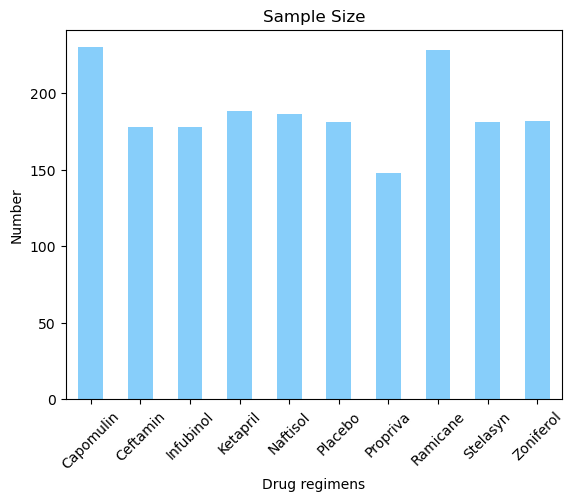

In [138]:
#count["Mouse ID"].plot(kind="bar", xlabel="Drug regimens", ylabel="Number", rot=45, color="lightskyblue", title="Sample Size")
count.plot(kind="bar", x="Drug Regimen", y="Mouse ID", xlabel="Drug regimens", ylabel="Number", rot=45, color="lightskyblue", title="Sample Size", legend=False)
plt.show()

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

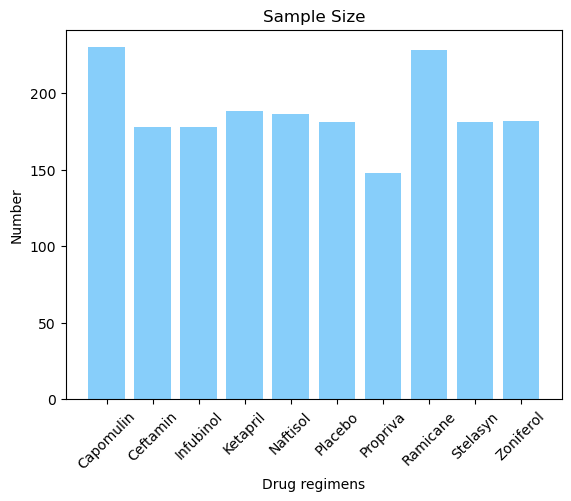

In [85]:
count = count.reset_index()

plt.bar(count["Drug Regimen"], count["Mouse ID"], color="lightskyblue")
plt.ylabel("Number")
plt.xlabel("Drug regimens")
plt.title("Sample Size")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [26]:
sexcount = data.groupby("Sex").count()
sexcount

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


<Axes: title={'center': 'Sex of the Subject'}>

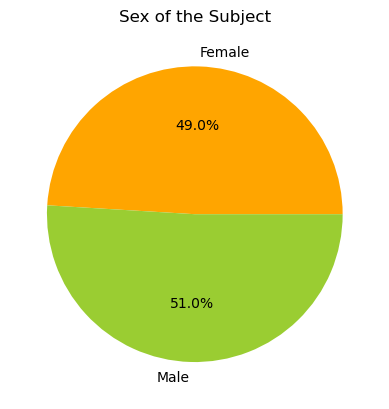

In [87]:
sexcount = data.groupby("Sex").count()
sexcount["Mouse ID"].plot(kind="pie", title="Sex of the Subject", autopct="%.1f%%", colors=["orange", "yellowgreen"], ylabel="")

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

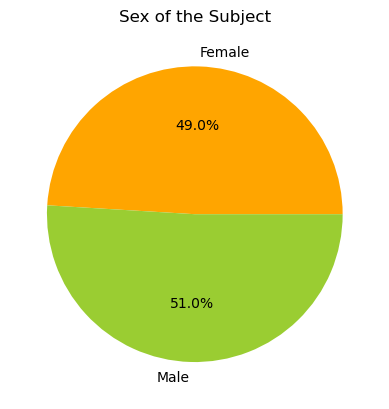

In [88]:
sexcount = sexcount.reset_index()
plt.pie(sexcount["Mouse ID"], autopct="%.1f%%", colors=["orange", "yellowgreen"], labels=sexcount["Sex"])
plt.title("Sex of the Subject")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = pd.DataFrame(data.groupby("Mouse ID")["Timepoint"].max())
timepoint

# Merge this group df with the original DataFrame to get the tumor volume 
# at the last timepoint
finaltumor = pd.merge(timepoint, data, on=["Mouse ID", "Timepoint"])
finaltumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor = []
mice = []

for index, row in finaltumor.iterrows():
    for i in range(4):
        if row["Drug Regimen"] == treatment[i]:
            tumor.append(row["Tumor Volume (mm3)"])
            mice.append(row["Mouse ID"])

In [32]:
finaltumor.dtypes

Mouse ID               object
Timepoint               int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [33]:
cap = finaltumor.loc[finaltumor["Drug Regimen"] == "Capomulin", :]
ram = finaltumor.loc[finaltumor["Drug Regimen"] == "Ramicane", :]
inf = finaltumor.loc[finaltumor["Drug Regimen"] == "Infubinol", :]
cef = finaltumor.loc[finaltumor["Drug Regimen"] == "Ceftamin", :]
cap = cap.reset_index()
ram = ram.reset_index()
inf = inf.reset_index()
cef = cef.reset_index()

In [34]:
cap = cap["Tumor Volume (mm3)"]
ram = ram["Tumor Volume (mm3)"]
inf = inf["Tumor Volume (mm3)"]
cef = cef["Tumor Volume (mm3)"]
treatmenttumor = pd.concat([cap, ram, inf, cef], axis=1)
treatmenttumor.columns = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatmenttumor

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [68]:
for i in treatmenttumor.columns:
    q1 = treatmenttumor[i].quantile(0.25)
    q3 = treatmenttumor[i].quantile(.75)
    iqr = q3 - q1

    #print (q1 - 1.5*iqr)
    #print (q1 + 1.5*iqr)
    for j in range(len(treatmenttumor)):
        if (treatmenttumor.loc[j, i] < (q1 - 1.5*iqr)) | \
        (treatmenttumor.loc[j, i] > (q3 + 1.5*iqr)):
            print (f"{i} has potential outliers:")
            print (treatmenttumor.loc[j, i])

Infubinol has potential outliers:
36.3213458


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

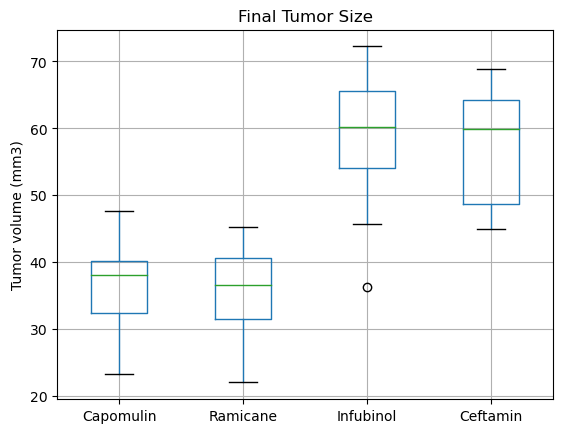

In [89]:
treatmenttumor.boxplot(column=["Capomulin", "Ramicane", 
                               "Infubinol", "Ceftamin"])
plt.title("Final Tumor Size")
plt.ylabel("Tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

In [71]:
Capomulindata = data.loc[data["Drug Regimen"]=="Capomulin",:]
Capomulindata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [72]:
Capomulindata.sample(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
141,m957,Capomulin,Female,3,19,30,38.212479,1


In [74]:
m957 = Capomulindata.loc[Capomulindata["Mouse ID"]=="m957",:]
m957

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1
140,m957,Capomulin,Female,3,19,25,37.695432,1
141,m957,Capomulin,Female,3,19,30,38.212479,1
142,m957,Capomulin,Female,3,19,35,32.562839,1
143,m957,Capomulin,Female,3,19,40,32.947615,1
144,m957,Capomulin,Female,3,19,45,33.329098,1


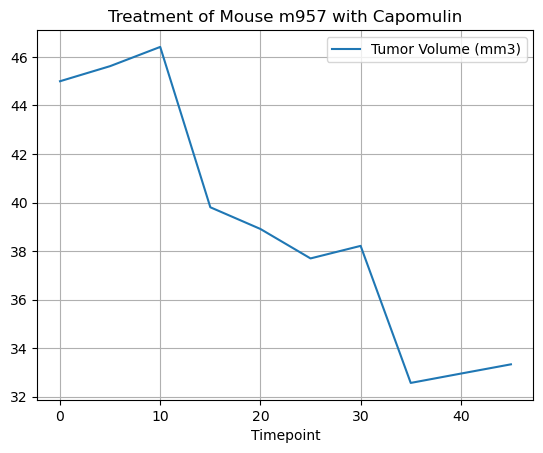

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
m957.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Treatment of Mouse m957 with Capomulin", grid=True)
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [93]:
weightdata = Capomulindata.groupby("Mouse ID").mean()
weightdata

/var/folders/nq/4fdxpg5x3813lq3gth8vk6sc0000gn/T/ipykernel_23258/290800517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weightdata = Capomulindata.groupby("Mouse ID").mean()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


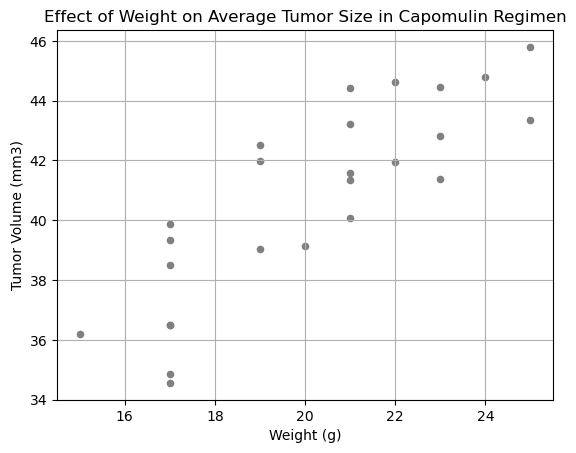

In [118]:
weightdata.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Effect of Weight on Average Tumor Size in Capomulin Regimen", color="gray")
plt.show()

## Correlation and Regression

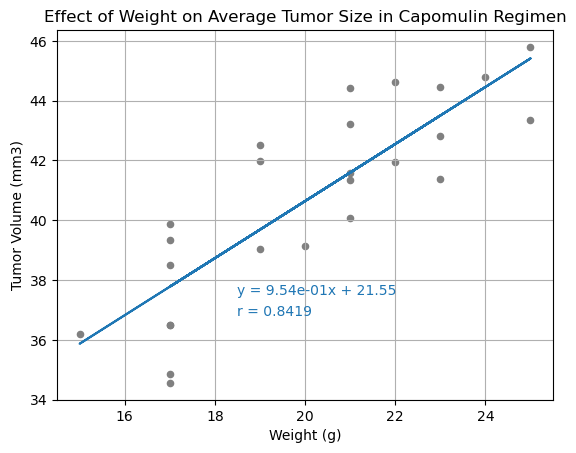

In [124]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weightdata.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, title="Effect of Weight on Average Tumor Size in Capomulin Regimen", color="gray")
x = weightdata["Weight (g)"]
y = weightdata["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg = x * slope + intercept
plt.plot(x, reg)
plt.annotate(f"y = {slope:.2e}x + {round(intercept, 2)}", (18.5,37.5), color="#1F76B4")
plt.annotate(f"r = {round(rvalue,4)}", (18.5,36.8), color="#1F76B4")
plt.show()